# Exploring Weather Trends


## Summary

To analyze local and global temperature data and compare the temperature trends where we live to overall global temperature trends.

## Goals
1.Extraction of dataset from database and export to CSV file.<br>
2.A chart visualisation based on the extracted data.<br>
3.Derive Observations based on the visualisations.<br>

## Outline

Tools Used:

By using the SQL queries to extract the data<br>

1.SQL Queries used to extract data from the temperatures database and downloaded the results to a CSV: <br>
a) Query used to extract the city level data: "Select * from city_data"<br>
b) Query used to extract the global level data: "Select * from global_data"<br>
c) Query used to extract the city list data :"Select * from city_list"<br>

>Now using Pandas to extract the global and city level dataset into dataframe-<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
city_list=pd.read_csv('city_list.csv')
city_data=pd.read_csv('city_data.csv',index_col='year')
global_data=pd.read_csv('global_data.csv',index_col='year')

In [4]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


#### Note: Checking my city name in the city_list dataset

In [5]:
city_list[city_list['country']=='India']['city']

6           Agra
7      Ahmadabad
12     Allahabad
14      Amritsar
30     Bangalore
44        Bhopal
85         Delhi
117        Haora
125    Hyderabad
129       Indore
135       Jaipur
145       Kanpur
181     Ludhiana
215       Nagpur
222    New Delhi
238        Patna
255         Pune
260       Rajkot
262       Ranchi
298        Surat
319     Vadodara
322     Varanasi
Name: city, dtype: object

In [6]:
city_data.head()

,city,country,avg_temp
year,,,
1849,Abidjan,Côte D'Ivoire,25.58
1850,Abidjan,Côte D'Ivoire,25.52
1851,Abidjan,Côte D'Ivoire,25.67
1852,Abidjan,Côte D'Ivoire,NaN
1853,Abidjan,Côte D'Ivoire,NaN


#### Dropping the rows with null values in avg_temp

In [7]:
city_new=city_data[city_data['country']=='India']
city_new=city_new[city_new['city']=='Kanpur' ]

null_year=city_new[city_new['avg_temp'].isnull()].index.values
city_new.drop(null_year,inplace=True)
city_new.head()

,city,country,avg_temp
year,,,
1796,Kanpur,India,24.59
1797,Kanpur,India,26.21
1798,Kanpur,India,23.82
1799,Kanpur,India,24.85
1800,Kanpur,India,24.79


#### Finding the Moving average using rolling(window=10) means 10 year moving_average 
> I used 10 year moving average in order to smooth out the lines, making trends more observable 

In [8]:
for i in null_year:
    if i in global_data.index:
        global_data.drop(i,inplace=True)

city_new['10Y_moving_avg']=city_new['avg_temp'].rolling(window=10).mean()

In [9]:
global_data['10Y_moving_avg']=global_data['avg_temp'].rolling(window=10).mean()

In [10]:
city_new.describe()

,avg_temp,10Y_moving_avg
count,206.000000,197.000000
mean,24.762524,24.741046
std,0.573586,0.390632
min,23.320000,23.764000
25%,24.430000,24.504000
50%,24.750000,24.723000
75%,25.117500,24.978000
max,26.760000,25.648000


In [11]:
global_data.describe()

,avg_temp,10Y_moving_avg
count,254.000000,245.000000
mean,8.405236,8.390278
std,0.564278,0.426394
min,5.780000,7.557000
25%,8.100000,8.093000
50%,8.405000,8.281000
75%,8.727500,8.645000
max,9.830000,9.594000


#### Visualisation of the dataset (Year vs 10_Year_Moving_Average)

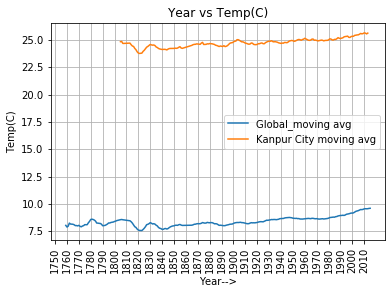

In [13]:
x=global_data.index
y=global_data['10Y_moving_avg']
xx=city_new.index
yy=city_new['10Y_moving_avg']
plt.plot(x,y,xx,yy);
plt.grid(True);
plt.xlabel('Year-->');
plt.ylabel('Temp(C)');
xtick=np.arange(1750,2013,10);
plt.xticks(xtick,rotation=90);
plt.legend(('Global_moving avg','Kanpur City moving avg'),loc=0);
plt.title("Year vs Temp(C)")
plt.show();


# Observations
>1. According to the line chart, the Kanpur city's moving average temperature is in the range of 23.7 to 25.6 degree and the global moving avg temp is in range of 7.5 to 9.6 degree.<br>
>2. The Kanpur city's average temperature is hotter than global average temperature.
>3. On Comparing both the lines in the chart, its found that the trends are same in global moving average temperature and Kanpur city moving average temperature. <br>
>4. According to the above visualisation, the average temperature is increasing over the years which means overall the world is getting hotter.<br>
>5. According to the graph, the trend of the average temperature over the last few hundered years is consistent.